In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [2]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import load_spectral_types, main_sequence_cut_r, main_locus

In [3]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
name = "Spectral-Class-Velocity"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")

Creating Spectral-Class-Velocity dir in Data dir


In [5]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Best-Pars")
files = glob(join(gaia_dir, "*.hdf5"))
# file = join(data_dir, "mamajek-spectral-class.hdf5")
files

['/home2/s20321005/Thesis-Project/Data/Best-Pars/clean-180-240.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/clean-240-300.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/clean-120-180.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/clean-060-120.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/clean-300-360.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/clean-000-060.hdf5']

In [6]:
raw = vaex.open_many(files)
raw

#,source_id,ra,dec,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,Gmag,BPmag,RPmag,bp_rp,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,Jmag,Hmag,Kmag,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,5764626493907404928,180.77497120163,-89.74483590708,9.478,-4.958,0.022,-8.078,0.02261984,1.9652,0.0171,14.470432,14.99604,13.798712,1.197329,302.87201459389,-26.87876739519,512.7744,508.4371,516.0735,0.2214,0.213,0.2286,13.002,12.516,12.48,K,--,-12.640000343322754,3.2799999713897705,gaia,4996.2001953125,11.7001953125,10.7998046875,0.0,gspphot,4.5192999839782715,0.0036001205444335938,0.006000041961669922,0.0,gspphot,0.3508000075817108,0.014500021934509277,0.014999985694885254,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,5764677964795486848,180.78708661226,-89.61452359012,7.155,4.592,0.021,-5.488,0.02276008,1.3628,0.0171,14.755868,15.207962,14.138418,1.069544,302.84166403238,-26.75128949992,742.406,723.0515,816.3685,0.1714,0.1463,0.2038,13.413,12.979,12.931,K,--,37.029998779296875,5.820000171661377,gaia,5147.0,42.2998046875,50.89990234375,0.0,gspphot,4.396299839019775,0.06009960174560547,0.02310037612915039,0.0,gspphot,-0.4068000018596649,0.04519999027252197,0.04980000853538513,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
2,5764679064307089664,180.74408997732,-89.56268605133,14.677,-14.494,0.015,-2.309,0.0170029,1.9766,0.0133,12.098805,12.409622,11.614234,0.795388,302.8291133821,-26.70066256375,530.2942,517.3372,592.6332,0.2248,0.2126,0.2346,11.049,10.746,10.687,G,--,5.28000020980835,0.9300000071525574,gaia,6070.2001953125,28.7001953125,23.0,0.0,gspphot,3.916300058364868,0.08249998092651367,0.02110004425048828,0.0,gspphot,-0.7197999954223633,0.032199978828430176,0.021399974822998047,0.0,gspphot,0.1899999976158142,0.16999999806284904,0.22999998927116394,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,5764893743952200704,180.24920602574,-89.1365313556,2.946,0.664,0.013,-2.87,0.013664279,0.9392,0.0111,13.1322,13.70861,12.413128,1.295482,302.72168263083,-26.28546588038,982.1395,953.8985,1017.3578,0.2816,0.2725,0.2905,11.496,10.948,10.79,K,--,7.210000038146973,1.0099999904632568,gaia,4870.7998046875,12.599609375,12.60009765625,0.0,gspphot,3.3268001079559326,0.03150010108947754,0.025999784469604492,0.0,gspphot,-0.09210000187158585,0.013799995183944702,0.010899998247623444,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,5764911336138262144,180.59525347256,-88.94737618364,30.534,-30.523,0.012,-0.798,0.012975621,4.4739,0.0106,12.397581,12.86211,11.776171,1.085939,302.68279893935,-26.09946185637,225.234,223.3351,239.6481,0.0639,0.051,0.0725,11.048,10.66,10.548,K,--,2.369999885559082,0.8999999761581421,gaia,5067.0,20.89990234375,12.5,0.0,gspphot,4.503699779510498,0.03569984436035156,0.006600379943847656,0.0,gspphot,0.289900004863739,0.02529999613761902,0.013799995183944702,0.0,gspphot,-0.03999999910593033,0.07999999821186066,0.03999999910593033,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"21,298,342",576356749673201024,59.91438488185,89.01374662224,1.44,1.4,0.018,0.337,0.017144516,0.468,0.0152,10.26004,11.268821,9.281935,1.986886,123.73828878126,26.45402507839,1822.0059,1675.5856,1966.8372,1.3357,1.2045,1.4897,7.83,7.033,6.758,K,--,21.56999969482422,0.17000000178813934,gaia,4538.10009765625,132.7001953125,187.89990234375,0.0,gspp

In [19]:
cols = ["parallax", "Jmag", "Kmag", "spectraltype_esphs", "ra", "dec", "GLON", "GLAT", "rv", "e_rv", "pmra", "e_pmra", "pmdec", "e_pmdec"]
data = raw[cols]
data["J-K"] = data["Jmag"] - data["Kmag"]
data["M_J"] = data["Jmag"] -10 - 5*np.log10(1/data["parallax"])
data["GLON"] = data["GLON"]*np.pi/180
data["GLAT"] = data["GLAT"]*np.pi/180
data["dec"] = data["dec"]*np.pi/180
data["ra"] = data["ra"]*np.pi/180
data

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J
0,1.9652,13.002,12.48,K,3.1551184526663736,-1.566342873240578,5.286113866811697,-0.46912298992376533,-12.640000343322754,3.2799999713897705,-4.958,0.022,-8.078,0.02261984,0.5220003,4.4690336323554245
1,1.3628,13.413,12.931,K,3.1553299064720983,-1.5640684942537235,5.285584149583518,-0.46689808092779134,37.029998779296875,5.820000171661377,4.592,0.021,-5.488,0.02276008,0.48200035,4.085160731290722
2,1.9766,11.049,10.687,G,3.154579473625117,-1.5631637585257077,5.285365099412866,-0.4660144742014279,5.28000020980835,0.9300000071525574,-14.494,0.015,-2.309,0.0170029,0.3619995,2.528593741521412
3,0.9392,11.496,10.79,K,3.145942119254766,-1.5557259559623844,5.283490079085313,-0.4587679250332609,7.210000038146973,1.0099999904632568,0.664,0.013,-2.87,0.013664279,0.7060003,1.3597907094346884
4,4.4739,11.048,10.548,K,3.1519817865698947,-1.5524245754145065,5.282811430643657,-0.45552154239232784,2.369999885559082,0.8999999761581421,-30.523,0.012,-0.798,0.012975621,0.5,4.30143169858498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"21,298,342",0.468,7.83,6.758,K,1.0457032854953963,1.5535829580940692,2.1596405500165483,0.46170983802305654,21.56999969482422,0.17000000178813934,1.4,0.018,0.337,0.017144516,1.072,-3.818770810923325
"21,298,343",1.2446,10.872,10.679,A,1.041550701898804,1.5587896784316795,2.1553621018895965,0.465241619231894,-15.770000457763672,2.8499999046325684,-2.504,0.017,8.408,0.014097458,0.19299984,1.3471487238428443
"21,298,344",2.0418,10.563,10.121,G,1.0438349502773447,1.5593503805649431,2.1549271533746834,0.46564619650123207,-24.34000015258789,1.3200000524520874,3.278,0.02,4.114,0.01509191,0.44199944,2.113065722739062
"21,298,345",1.6477,13.159,12.616,K,1.0470832377432218,1.562068011661741,2.1527334294018505,0.4675289893443833,-33.119998931884766,5.639999866485596,0.698,0.023,-3.144,0.019328598,0.5430002,4.2433911052428


In [24]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180

C1 = np.sin(delta_G)*np.cos(data.dec) - np.cos(delta_G)*np.sin(data.dec)*np.cos(data.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(data.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

data["pmlon"] = 1/cosb*(C1*data.pmra+C2*data.pmdec)
data["pmlat"] = 1/cosb*(-1*C2*data.pmra+C1*data.pmdec)
data["e_pmlon"] = 1/cosb*np.sqrt((C1*data.e_pmra)**2 + (C2*data.e_pmdec)**2)
data["e_pmlat"] = 1/cosb*np.sqrt((C2*data.e_pmra)**2 + (C1*data.e_pmdec)**2)
data

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat
0,1.9652,13.002,12.48,K,3.1551184526663736,-1.566342873240578,5.286113866811697,-0.46912298992376533,-12.640000343322754,3.2799999713897705,-4.958,0.022,-8.078,0.02261984,0.5220003,4.4690336323554245,-3.1612079012617427,-8.935469355607477,0.02202741059047981,0.02259314805552358
1,1.3628,13.413,12.931,K,3.1553299064720983,-1.5640684942537235,5.285584149583518,-0.46689808092779134,37.029998779296875,5.820000171661377,4.592,0.021,-5.488,0.02276008,0.48200035,4.085160731290722,5.635097957814761,-4.410247045895718,0.021079531450081096,0.02268644052204566
2,1.9766,11.049,10.687,G,3.154579473625117,-1.5631637585257077,5.285365099412866,-0.4660144742014279,5.28000020980835,0.9300000071525574,-14.494,0.015,-2.309,0.0170029,0.3619995,2.528593741521412,-13.690854908902079,-5.288478879923024,0.015093118557758892,0.016920294635530155
3,0.9392,11.496,10.79,K,3.145942119254766,-1.5557259559623844,5.283490079085313,-0.4587679250332609,7.210000038146973,1.0099999904632568,0.664,0.013,-2.87,0.013664279,0.7060003,1.3597907094346884,1.2701744812086324,-2.6579038333405482,0.01303195428984988,0.013633807060056548
4,4.4739,11.048,10.548,K,3.1519817865698947,-1.5524245754145065,5.282811430643657,-0.45552154239232784,2.369999885559082,0.8999999761581421,-30.523,0.012,-0.798,0.012975621,0.5,4.30143169858498,-29.67098829696249,-7.205746767789947,0.012044910946358178,0.012933942288928657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"21,298,342",0.468,7.83,6.758,K,1.0457032854953963,1.5535829580940692,2.1596405500165483,0.46170983802305654,21.56999969482422,0.17000000178813934,1.4,0.018,0.337,0.017144516,1.072,-3.818770810923325,0.7150731937843366,1.2498957266632562,0.01755221209667082,0.017602677395577228
"21,298,343",1.2446,10.872,10.679,A,1.041550701898804,1.5587896784316795,2.1553621018895965,0.465241619231894,-15.770000457763672,2.8499999046325684,-2.504,0.017,8.408,0.014097458,0.19299984,1.3471487238428443,-7.826956700277292,3.962729969602319,0.015537308064029394,0.015694916743865184
"21,298,344",2.0418,10.563,10.121,G,1.0438349502773447,1.5593503805649431,2.1549271533746834,0.46564619650123207,-24.34000015258789,1.3200000524520874,3.278,0.02,4.114,0.01509191,0.44199944,2.113065722739062,-0.7464146587706398,5.207028438291107,0.017571569336894074,0.017860730125205712
"21,298,345",1.6477,13.159,12.616,K,1.0470832377432218,1.562068011661741,2.1527334294018505,0.4675289893443833,-33.119998931884766,5.639999866485596,0.698,0.023,-3.144,0.019328598,0.5430002,4.2433911052428,2.773922051764868,-1.6362446182440396,0.021119144568284894,0.02136764927187469


In [27]:
# calculate vertical velocities and their errors
data["w"] = 4.74*data["pmlat"]*np.cos(data.GLAT)/data["parallax"] + data["rv"]*np.sin(data.GLAT)
data["e_w"] = np.sqrt((4.74*np.cos(data.GLAT)/data.parallax*data.e_pmlat)**2 + (np.sin(data.GLAT)*data.e_rv)**2)
data

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w
0,1.9652,13.002,12.48,K,3.1551184526663736,-1.566342873240578,5.286113866811697,-0.46912298992376533,-12.640000343322754,3.2799999713897705,-4.958,0.022,-8.078,0.02261984,0.5220003,4.4690336323554245,-3.1612079012617427,-8.935469355607477,0.02202741059047981,0.02259314805552358,-13.50909627786833,1.483698157046022
1,1.3628,13.413,12.931,K,3.1553299064720983,-1.5640684942537235,5.285584149583518,-0.46689808092779134,37.029998779296875,5.820000171661377,4.592,0.021,-5.488,0.02276008,0.48200035,4.085160731290722,5.635097957814761,-4.410247045895718,0.021079531450081096,0.02268644052204566,-30.365518771641376,2.6206373832774825
2,1.9766,11.049,10.687,G,3.154579473625117,-1.5631637585257077,5.285365099412866,-0.4660144742014279,5.28000020980835,0.9300000071525574,-14.494,0.015,-2.309,0.0170029,0.3619995,2.528593741521412,-13.690854908902079,-5.288478879923024,0.015093118557758892,0.016920294635530155,-13.702196209550229,0.4194455636225983
3,0.9392,11.496,10.79,K,3.145942119254766,-1.5557259559623844,5.283490079085313,-0.4587679250332609,7.210000038146973,1.0099999904632568,0.664,0.013,-2.87,0.013664279,0.7060003,1.3597907094346884,1.2701744812086324,-2.6579038333405482,0.01303195428984988,0.013633807060056548,-15.219913569722804,0.45150685611375924
4,4.4739,11.048,10.548,K,3.1519817865698947,-1.5524245754145065,5.282811430643657,-0.45552154239232784,2.369999885559082,0.8999999761581421,-30.523,0.012,-0.798,0.012975621,0.5,4.30143169858498,-29.67098829696249,-7.205746767789947,0.012044910946358178,0.012933942288928657,-7.89850834614481,0.3961288423127527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"21,298,342",0.468,7.83,6.758,K,1.0457032854953963,1.5535829580940692,2.1596405500165483,0.46170983802305654,21.56999969482422,0.17000000178813934,1.4,0.018,0.337,0.017144516,1.072,-3.818770810923325,0.7150731937843366,1.2498957266632562,0.01755221209667082,0.017602677395577228,20.942676153081674,0.17667053784723366
"21,298,343",1.2446,10.872,10.679,A,1.041550701898804,1.5587896784316795,2.1553621018895965,0.465241619231894,-15.770000457763672,2.8499999046325684,-2.504,0.017,8.408,0.014097458,0.19299984,1.3471487238428443,-7.826956700277292,3.962729969602319,0.015537308064029394,0.015694916743865184,6.412769005955792,1.2797358536422874
"21,298,344",2.0418,10.563,10.121,G,1.0438349502773447,1.5593503805649431,2.1549271533746834,0.46564619650123207,-24.34000015258789,1.3200000524520874,3.278,0.02,4.114,0.01509191,0.44199944,2.113065722739062,-0.7464146587706398,5.207028438291107,0.017571569336894074,0.017860730125205712,-0.1276411523438039,0.5938372519562701
"21,298,345",1.6477,13.159,12.616,K,1.0470832377432218,1.562068011661741,2.1527334294018505,0.4675289893443833,-33.119998931884766,5.639999866485596,0.698,0.023,-3.144,0.019328598,0.5430002,4.2433911052428,2.773922051764868,-1.6362446182440396,0.021119144568284894,0.02136764927187469,-19.12848934630061,2.5424376786255394


In [28]:
df_mask = data.filter("1/parallax*cos(GLAT) < 0.15").filter("1/parallax*abs(sin(GLAT)) < 0.013")
df_mask = df_mask.extract()
df_mask

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w
0,16.8269,10.091,9.258,M,3.14530676080953,-1.2597360975526954,5.219135655157141,-0.16911345394677113,55.650001525878906,0.5699999928474426,117.121,0.012,31.127,0.014052705,0.8329992,6.221020172187708,108.65703081425377,53.66440556486492,0.012086754904951803,0.013978157109864076,5.534803550952343,0.09601433686327594
1,11.1549,12.957,12.245,M,3.1532172593490695,-1.2223785729529772,5.214357700584632,-0.13196956990354816,153.61000061035156,5.980000019073486,74.12,0.027,9.886,0.03044098,0.7119999,8.194328185400021,70.90055649036775,23.76170207195125,0.0271312964435428,0.030324017782479774,-10.203901150786407,0.7869929750673379
2,10.2433,10.692,9.848,M,3.1428123327493034,-1.1729672567265599,5.200978133647856,-0.084230795498612,-28.56999969482422,12.550000190734863,-80.448,0.011,8.617,0.01167618,0.8440008,5.744199850476345,-80.5636001948656,-7.459203485751973,0.011027212491243586,0.0116504833699748,-1.0358164705881587,1.05586062295268
3,6.9796,12.848,12.011,M,3.1435672697152994,-1.0493075046275027,5.176944734146143,0.037074829363216454,57.119998931884766,5.809999942779541,-25.815,0.032,-2.827,0.032774046,0.8369999,7.06715224262434,-24.756218838415894,-7.844474668482391,0.032030235613178824,0.03274449869900514,-3.2064654067316907,0.21649891733977175
4,9.9032,9.415,8.596,K,3.1442750275588027,-1.1103475400200127,5.18924234670745,-0.022715359110575154,6.300000190734863,7.150000095367432,-40.402,0.014,-8.015,0.016022818,0.81900024,4.393877711500199,-38.05065534789937,-15.77052493087587,0.014082906459182913,0.015949998571246685,-7.689443456140604,0.16258009692912312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"39,790",9.7788,11.577,10.69,M,1.0433612368267091,1.0945184436995252,2.4899211378107884,0.1268813150883146,-8.930000305175781,1.6699999570846558,-4.531,0.02,-29.744,0.02050577,0.8870001,6.528427483564944,16.069462491719058,-25.436349428077023,0.0202187522296381,0.020290111968345834,-13.360459073969785,0.21154879064046478
"39,791",19.8024,11.958,11.138,M,1.0349498114418785,1.1510191888146315,2.4497594204302855,0.16721254261987084,-16.260000228881836,2.4800000190734863,150.212,0.01,-116.105,0.017637614,0.82000065,8.441589327239276,189.56665529995536,10.41629336126325,0.013794785989910312,0.014858980538220705,-0.2477035917613697,0.4127722636651027
"39,792",12.2707,11.441,10.606,M,1.0440162306419418,1.132196996974589,2.465145602179305,0.15548127305059084,-1.100000023841858,1.2100000381469727,-2.843,0.009,-58.855,0.01575372,0.83500004,6.8853466767242075,36.610054843299835,-46.17031035601318,0.012388298863643704,0.013255554991387601,-17.790146222629094,0.1874435367436267
"39,793",26.226,9.161,8.32,M,1.039793746171602,1.3202853777445789,2.335301842323113,0.29473786862807483,-16.65999984741211,0.27000001072883606,61.139,0.013,-4.768,0.013825506,0.84100056,6.2546605361365,48.2211331418488,37.887114742562424,0.013384763481230967,0.013453353845093247,1.7127642332539494,0.0784665441363698


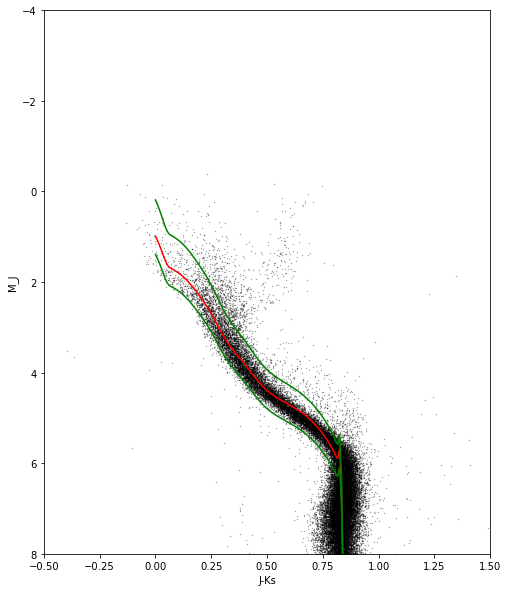

In [29]:
# HR diagram
JK = np.linspace(0, 0.86, 100)
MJ = main_locus(JK)
MJ_high = main_sequence_cut_r(JK)
MJ_low = main_sequence_cut_r(JK, low=True)
plt.figure(figsize=(8,10))
df_mask.viz.scatter("J-K", "M_J", c='k', alpha=0.5, s=0.1, length_check=False)
plt.plot(JK, MJ, c="red")
plt.plot(JK, MJ_low, c="green")
plt.plot(JK, MJ_high, c="green")
plt.xlabel("J-Ks")
plt.ylabel("M_J")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
plt.show()

In [30]:
df_s = load_spectral_types()
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [31]:
df_mask['M_J_upper'] = main_sequence_cut_r(df_mask['J-K'].to_numpy())
df_mask['M_J_lower'] = main_sequence_cut_r(df_mask['J-K'].to_numpy(), low=True)
df_mask

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,16.8269,10.091,9.258,M,3.14530676080953,-1.2597360975526954,5.219135655157141,-0.16911345394677113,55.650001525878906,0.5699999928474426,117.121,0.012,31.127,0.014052705,0.8329992,6.221020172187708,108.65703081425377,53.66440556486492,0.012086754904951803,0.013978157109864076,5.534803550952343,0.09601433686327594,6.123652410041071,6.785138554582792
1,11.1549,12.957,12.245,M,3.1532172593490695,-1.2223785729529772,5.214357700584632,-0.13196956990354816,153.61000061035156,5.980000019073486,74.12,0.027,9.886,0.03044098,0.7119999,8.194328185400021,70.90055649036775,23.76170207195125,0.0271312964435428,0.030324017782479774,-10.203901150786407,0.7869929750673379,4.741192612434916,5.528356920395378
2,10.2433,10.692,9.848,M,3.1428123327493034,-1.1729672567265599,5.200978133647856,-0.084230795498612,-28.56999969482422,12.550000190734863,-80.448,0.011,8.617,0.01167618,0.8440008,5.744199850476345,-80.5636001948656,-7.459203485751973,0.011027212491243586,0.0116504833699748,-1.0358164705881587,1.05586062295268,9.541636728716961,9.892397026106329
3,6.9796,12.848,12.011,M,3.1435672697152994,-1.0493075046275027,5.176944734146143,0.037074829363216454,57.119998931884766,5.809999942779541,-25.815,0.032,-2.827,0.032774046,0.8369999,7.06715224262434,-24.756218838415894,-7.844474668482391,0.032030235613178824,0.03274449869900514,-3.2064654067316907,0.21649891733977175,7.381768554606488,7.928880504187717
4,9.9032,9.415,8.596,K,3.1442750275588027,-1.1103475400200127,5.18924234670745,-0.022715359110575154,6.300000190734863,7.150000095367432,-40.402,0.014,-8.015,0.016022818,0.81900024,4.393877711500199,-38.05065534789937,-15.77052493087587,0.014082906459182913,0.015949998571246685,-7.689443456140604,0.16258009692912312,5.522998209597867,6.239089281452607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"39,790",9.7788,11.577,10.69,M,1.0433612368267091,1.0945184436995252,2.4899211378107884,0.1268813150883146,-8.930000305175781,1.6699999570846558,-4.531,0.02,-29.744,0.02050577,0.8870001,6.528427483564944,16.069462491719058,-25.436349428077023,0.0202187522296381,0.020290111968345834,-13.360459073969785,0.21154879064046478,9.526815106141633,9.878922823765121
"39,791",19.8024,11.958,11.138,M,1.0349498114418785,1.1510191888146315,2.4497594204302855,0.16721254261987084,-16.260000228881836,2.4800000190734863,150.212,0.01,-116.105,0.017637614,0.82000065,8.441589327239276,189.56665529995536,10.41629336126325,0.013794785989910312,0.014858980538220705,-0.2477035917613697,0.4127722636651027,5.4877383267614634,6.207034842510422
"39,792",12.2707,11.441,10.606,M,1.0440162306419418,1.132196996974589,2.465145602179305,0.15548127305059084,-1.100000023841858,1.2100000381469727,-2.843,0.009,-58.855,0.01575372,0.83500004,6.8853466767242075,36.610054843299835,-46.17031035601318,0.012388298863643704,0.013255554991387601,-17.790146222629094,0.1874435367436267,6.663279337386367,7.275708488533061
"39,793",26.226,9.161,8.32,M,1.039793746171602,1.3202853777445789,2.335301842323113,0.29473786862807483,-16.65999984741211,0.27000001072883606,61.139,0.013,-4.768,0.013825506,0.84100056,6.2546605361365,48.2211331418488,37.887114742562424,0.013384763481230967,0.013453353845093247,1.7127642332539494,0.0784665441363698,8.734562013132729,9.158692739211572


In [32]:
# Filter A star
JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2

mask_A = ((df_mask['J-K'] > JK_lower)
          *(df_mask['J-K'] < JK_upper)
          *(df_mask['M_J_lower'] > df_mask['M_J'])
          *(df_mask['M_J_upper'] < df_mask['M_J']))
df_A = df_mask[mask_A]
df_A

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,7.642,7.524,7.422,A,3.157484494542792,-1.0051686797707335,5.175593137132923,0.08177575488697528,-5.210000038146973,0.46000000834465027,-9.533,0.031,-1.728,0.02949938,0.10200024,1.9400353346086296,-9.049185489941769,-3.460681286773937,0.030949907844106103,0.02955193045156427,-2.56491382341113,0.041780554587351554,1.074383794307044,2.194894358460949
1,9.5025,7.081,6.997,A,3.1836831547480737,-1.01839359506658,5.1916142405642915,0.07115948394958252,10.75,0.46000000834465027,-36.892,0.019,-10.341,0.019567432,0.083999634,1.9701892426025136,-34.73270931341571,-16.173894050282556,0.019015070324213457,0.01955278681988406,-7.283062014791548,0.03412199687478013,1.0114508732111696,2.137682612010154
2,8.8192,7.067,7.02,A,3.190016175372693,-0.9843893736218721,5.189561933845031,0.10527335750118873,8.630000114440918,0.7200000286102295,-35.956,0.021,-10.643,0.022925608,0.04699993,1.7941458700394337,-33.84384145105115,-16.14626213202649,0.021049400603645362,0.02288025840120237,-7.723155457036586,0.07663889245723429,0.8189004447255448,1.9626367679323136
3,8.738,7.213,7.129,A,3.3379725717185074,-1.204800144793709,5.277055802599279,-0.10760717020286367,12.140000343322754,0.33000001311302185,-52.691,0.022,1.906,0.024538506,0.083999634,1.920060022576977,-52.72224902187695,0.5820438773796226,0.022001693442528867,0.024536987531639038,-0.9899231754464763,0.03783182407374088,1.0114508732111696,2.137682612010154
4,9.1436,7.241,7.168,A,3.3522442432264117,-1.1716606758496402,5.281783328657951,-0.07437565746159355,12.779999732971191,0.6399999856948853,-36.034,0.02,-13.163,0.025516434,0.072999954,2.046586270290332,-35.86929562707531,-13.605416429403247,0.020000950044808518,0.02551568896777112,-7.983131167928149,0.04935198352973555,0.978417433415548,2.1076522121959527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.1723,5.721,5.68,A,0.9322283498786205,0.9594923178159678,2.528006436160936,-0.014700895918654502,-8.069999694824219,0.6399999856948853,-41.053,0.028,-0.357,0.02776867,0.041000366,1.3193082607392306,-33.27401011940955,-24.048212170001957,0.027922745070114302,0.027846353257065446,-8.534086898207624,0.013744147465420594,0.7406394813819892,1.8914904376199901
175,10.6428,6.175,6.144,A,0.9317299850019636,1.0256469808674504,2.489506931628384,0.0390989457156874,10.5,0.27000001072883606,14.584,0.026,-44.649,0.026324948,0.031000137,1.3102796954614782,37.73342791118874,-27.971676300699666,0.026109287079900192,0.026216560477626258,-12.037832550180141,0.015732472536168704,0.5938232424865337,1.7580211295332124
176,11.329,6.222,6.096,A,0.9651626075189959,1.0270377437647735,2.5026815673084455,0.05043973797180176,3.109999895095825,0.23999999463558197,37.626,0.02,-65.271,0.021291666,0.12599993,1.492958006052472,69.31326571302998,-29.52440538257972,0.020476497569771948,0.020833820351757047,-12.180359899759425,0.014906668016401581,1.1796459398100012,2.290587218009092
177,11.7639,6.367,6.288,A,0.9854252148945517,0.9610447776886831,2.551563923049683,0.0047329501574907805,5.869999885559082,0.1899999976158142,6.98,0.023,-27.884,0.023648046,0.078999996,1.7197567234705327,22.625053242120963,-17.72977218666929,0.023246251869516992,0.023406021782726216,-7.115952238655939,0.009473602965164921,0.9959808173673126,2.1236189248793753


In [53]:
df_A_res = df_A[["w", "e_w", "spectraltype_esphs"]]
df_A_res = df_A_res.extract()
df_A_res

#,w,e_w,spectraltype_esphs
0,-2.56491382341113,0.041780554587351554,A
1,-7.283062014791548,0.03412199687478013,A
2,-7.723155457036586,0.07663889245723429,A
3,-0.9899231754464763,0.03783182407374088,A
4,-7.983131167928149,0.04935198352973555,A
...,...,...,...
174,-8.534086898207624,0.013744147465420594,A
175,-12.037832550180141,0.015732472536168704,A
176,-12.180359899759425,0.014906668016401581,A
177,-7.115952238655939,0.009473602965164921,A


In [54]:
df_A_res.export(join(data_dir, "A-type.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    40.56s =  0.7m =  0.0h
 

In [38]:
# Filter F star
JK_lower = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'F9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G0V']['J-K'].to_numpy()[0])/2

mask_F = ((df_mask['J-K'] > JK_lower)
          *(df_mask['J-K'] < JK_upper)
          *(df_mask['M_J_lower'] > df_mask['M_J'])
          *(df_mask['M_J_upper'] < df_mask['M_J']))
df_F = df_mask[mask_F]
df_F

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,7.3246,8.551,8.289,F,3.1418749775471158,-1.0278051767267415,5.17185832976354,0.05798583407459201,-0.75,0.33000001311302185,29.992,0.011,-2.121,0.011087015,0.26200008,2.8749192046133007,29.817528954409457,3.8644109580832424,0.01100342992891995,0.011083610878151195,2.453124826426539,0.020421157807494116,2.1850851853556157,3.2046228957778324
1,9.6896,7.707,7.423,F,3.142276705247578,-0.9968835670876673,5.165917310682679,0.08833465642045026,11.989999771118164,0.28999999165534973,-37.535,0.013,-9.13,0.014650184,0.28399992,2.638529024487264,-34.97986600840274,-16.390305031761653,0.013068795970079348,0.014588847456191918,-6.928862455514765,0.026553028284624015,2.4130879396232747,3.4118981269302497
2,9.9128,8.264,7.954,F,3.1438670341919495,-0.9825163550141839,5.163918201978279,0.10259179790944045,-4.940000057220459,0.20000000298023224,-103.84,0.011,16.031,0.01131825,0.30999994,3.244981658814096,-104.96253204964547,-4.754516455660247,0.01101254011828896,0.01130604890730064,-2.7674266401263874,0.021176607217718222,2.6632705120873874,3.639336829170352
3,8.3605,7.265,7.072,F,3.165659374508306,-1.184234544806873,5.211723157069162,-0.09365876305853776,14.109999656677246,0.2800000011920929,33.896,0.017,-40.071,0.019591974,0.19299984,1.8761611225488437,40.48458294430757,-33.400934131031136,0.017088077011490357,0.0195152017841912,-20.17331612859644,0.02840877975801397,1.605942197399949,2.67812927036359
4,7.2915,8.323,8.025,F,3.191529116986311,-1.183139259088216,5.221205493450254,-0.09094993748501429,-19.350000381469727,0.23999999463558197,-26.107,0.012,1.326,0.015292156,0.29800034,2.63708435487475,-25.996567856310673,-2.7408364949837023,0.012089794249236074,0.01522126514593545,-0.016920890241693742,0.023921754835925152,2.553404068387847,3.5394582439889515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,620",10.7219,7.598,7.371,F,1.0329748351537182,0.7547239538799967,2.7062579739142194,-0.1357343191369668,11.84000015258789,0.15000000596046448,9.127,0.024,-51.602,0.016173255,0.22700024,2.7493588114490324,40.46330899384816,-33.2984858254601,0.021054331734421807,0.019856719329373728,-16.18755425902542,0.02208268415060985,1.8659015292762553,2.9144559357056865
"1,621",7.9652,8.622,8.345,F,1.0310637684090027,0.8182558714146705,2.663843715217117,-0.08817744081684818,8.0,0.15000000596046448,61.203,0.016,-81.243,0.013114984,0.27699947,3.1279831659604698,99.17310258092662,-22.603716120872797,0.014867785497765474,0.014385818851611689,-14.103460851628357,0.01572291402889117,2.340295071811664,3.345722792556058
"1,622",7.4972,8.519,8.251,F,1.0341922070734786,0.9753469858482368,2.564038107202057,0.03324251475320465,-37.209999084472656,0.15000000596046448,-29.086,0.016,34.649,0.013131474,0.26799965,2.893495535966202,-44.573708652767415,7.728718777275266,0.014874660209258171,0.014393752720902332,3.6469487450579123,0.010371974502048567,2.246558181037928,3.2605074373072074
"1,623",7.7387,9.165,8.858,G,1.0362073890258183,0.9579061185892124,2.576178390448246,0.02065543527756314,-11.729999542236328,0.20000000298023224,15.019,0.016,-42.976,0.013428698,0.30700016,3.608340017047161,39.22185774995431,-23.111746183323095,0.014981271165338315,0.01455649231664354,-14.39533396396388,0.009824637544790462,2.6367834035756075,3.6152576396141884


In [55]:
df_F_res = df_F[["w", "e_w", "spectraltype_esphs"]]
df_F_res = df_F_res.extract()
df_F_res

#,w,e_w,spectraltype_esphs
0,2.453124826426539,0.020421157807494116,F
1,-6.928862455514765,0.026553028284624015,F
2,-2.7674266401263874,0.021176607217718222,F
3,-20.17331612859644,0.02840877975801397,F
4,-0.016920890241693742,0.023921754835925152,F
...,...,...,...
"1,620",-16.18755425902542,0.02208268415060985,F
"1,621",-14.103460851628357,0.01572291402889117,F
"1,622",3.6469487450579123,0.010371974502048567,F
"1,623",-14.39533396396388,0.009824637544790462,G


In [56]:
df_F_res.export(join(data_dir, "F-type.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    52.28s =  0.9m =  0.0h
 

In [39]:
# Filter G star
JK_lower = (df_s[df_s['SpT'] == 'F9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'G3V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G4V']['J-K'].to_numpy()[0])/2

mask_G = ((df_mask['J-K'] > JK_lower)
          *(df_mask['J-K'] < JK_upper)
          *(df_mask['M_J_lower'] > df_mask['M_J'])
          *(df_mask['M_J_upper'] < df_mask['M_J']))
df_G = df_mask[mask_G]
df_G

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,6.7355,8.918,8.59,F,3.17863814120438,-1.1275133727261624,5.207109954687481,-0.036881994951434384,2.4600000381469727,0.6000000238418579,-55.795,0.011,-4.31,0.013121706,0.32800007,3.059849423612013,-54.30655584090892,-13.50763183160695,0.011063855177561732,0.01306791014849254,-9.590023669072771,0.023956980727508907,2.8103847473861445,3.773077043078313
1,7.5872,8.651,8.336,G,3.1935435472291815,-1.1097923965256697,5.210709654107975,-0.018347105227532114,-14.279999732971191,0.38999998569488525,-135.592,0.011,47.343,0.011883675,0.31499958,3.0514076843786544,-141.23322070383253,26.0715838149994,0.011021433819902768,0.011863799001492998,16.547108022089976,0.010300926715071157,2.7060787487607176,3.678253407964289
2,27.9869,6.421,6.097,G,3.1894388803657825,-0.8084711172841853,5.160626902040088,0.27890449117689864,13.779999732971191,0.11999999731779099,89.415,0.019,168.065,0.015960889,0.32399988,3.655773983917202,60.89130870786552,180.36944024374927,0.018925898919628138,0.016048685445803058,33.16147423530458,0.03313949612412754,2.7792848538087114,3.744804412553374
3,9.8707,8.985,8.61,G,3.198270751921076,-1.2149598514638502,5.228508119110745,-0.12202196841573068,-34.59000015258789,0.2800000011920929,-140.715,0.01,61.672,0.012228514,0.375,3.9567394196999395,-148.36246509794648,39.90896840386392,0.010055367475583306,0.012183026516790853,23.232425874782766,0.03457258873567302,3.1334258355824405,4.0667507596204
4,16.0931,7.361,7.027,G,3.2021537036716357,-0.9635508842960154,5.193166022697384,0.12690706273923302,14.25,0.12999999523162842,-94.845,0.021,29.249,0.021483162,0.3340001,3.394198610683824,-98.10477446972938,15.050955193725594,0.021010468361627604,0.021472923807720343,6.200975829380684,0.01760915737454791,2.8555642889437207,3.8141493535852007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,325",7.1641,9.551,9.181,G,1.002975342288846,0.8525024510483759,2.627399282561598,-0.07372758894196513,15.010000228881836,0.33000001311302185,36.812,0.02,3.693,0.021217208,0.3699999,3.826807837985367,26.372227150849014,25.94739347418199,0.02048666507835094,0.020747685446847974,16.01534653457238,0.027898021529253764,3.1011685871400037,4.037425988309095
"1,326",13.8946,7.908,7.581,G,1.0017423990153564,1.0256971039593152,2.5184910577438306,0.061003294209339365,5.130000114440918,0.1899999976158142,49.672,0.013,-68.038,0.014248706,0.32700014,3.6222302361371836,81.30923620731622,-22.029188259735175,0.013502102263869088,0.013773847106171928,-7.1882994564791955,0.012496910009595399,2.802687604435929,3.766079640396299
"1,327",10.7483,8.745,8.393,G,1.016092202454234,0.8340111798562614,2.645886326826144,-0.08256640387133296,15.9399995803833,0.20999999344348907,-7.835,0.017,51.89,0.015278976,0.35200024,3.901698784025273,-39.02117130527816,35.08999166377981,0.016327006687413177,0.015996124269628254,14.107354617379562,0.018691735437401776,2.982536256911822,3.9295784153743836
"1,328",6.7492,9.564,9.192,G,1.0127960530218507,0.901762398659274,2.6012517657379908,-0.031485062003006735,-80.5199966430664,0.3100000023841858,-33.44,0.014,39.618,0.012804206,0.37199974,3.710261618909702,-50.947189112832724,9.602262519909495,0.013535814573484744,0.013293962058860296,9.275137350974589,0.013502434199310931,3.1140867513564188,4.049169773960381


In [57]:
df_G_res = df_G[["w", "e_w", "spectraltype_esphs"]]
df_G_res = df_G_res.extract()
df_G_res

#,w,e_w,spectraltype_esphs
0,-9.590023669072771,0.023956980727508907,F
1,16.547108022089976,0.010300926715071157,G
2,33.16147423530458,0.03313949612412754,G
3,23.232425874782766,0.03457258873567302,G
4,6.200975829380684,0.01760915737454791,G
...,...,...,...
"1,325",16.01534653457238,0.027898021529253764,G
"1,326",-7.1882994564791955,0.012496910009595399,G
"1,327",14.107354617379562,0.018691735437401776,G
"1,328",9.275137350974589,0.013502434199310931,G


In [58]:
df_G_res.export(join(data_dir, "G-type.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    53.45s =  0.9m =  0.0h
 